**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

from pprint import pprint

In [2]:
df = pd.read_csv('Rate_Connect_DS_case_study.csv', sep=';')

In [3]:
df.tail()

,hotel_id,locale,ymd,city,country,abc_category,stars,rating,direct_cost,other_cost,direct_clicks,other_clicks,direct_bookings,other_bookings,direct_booking_value,other_booking_value
589261,267127,DE,20190318,Skopje,Republic of Macedonia,B,3,8278,0,630,0,9,0,0,0.0,0.0
589262,267981,US,20190213,Naxos - Chora,Greece,B,0,8564,0,0,0,0,0,0,0.0,0.0
589263,267981,US,20190313,Naxos - Chora,Greece,B,0,8564,0,0,0,0,0,0,0.0,0.0
589264,268850,DE,20190111,Sevenum,Netherlands,C2,3,8526,87,0,1,0,0,0,0.0,0.0
589265,268850,DE,20190203,Sevenum,Netherlands,C2,3,8526,0,0,0,0,0,0,0.0,0.0


In [5]:
# transform date column
df['date'] = df['ymd'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))
df = df.drop(columns=['ymd'])

# 1 - Calculated Fields

Here I will create the calculated fields, according to the formulas given on the challenge description

To do so, first I will have to aggregate some values, than calculate those fields

**Sum the number of direct cost per campaign**

In [9]:
direct_cost_percampaign_df = df.groupby(['hotel_id','locale']).direct_cost.sum().reset_index()
direct_cost_percampaign_df = direct_cost_percampaign_df.rename(columns={'direct_cost':'direct_cost_per_campaign'})

df = df.merge(direct_cost_percampaign_df)

del direct_cost_percampaign_df

**Sum the number of direct direct booking value per campaign**

In [10]:
direct_booking_value_percampaign_df = df.groupby(['hotel_id','locale']).direct_booking_value.sum().reset_index()
direct_booking_value_percampaign_df = direct_booking_value_percampaign_df.rename(columns={'direct_booking_value':'direct_booking_value_per_campaign'})

df = df.merge(direct_booking_value_percampaign_df)

del direct_booking_value_percampaign_df

In [11]:
len(df.columns)

18

## 1.1 - CPA
Cost Per Acquisition= direct_cost/direct_booking_value


In [12]:
def calculate_cpa(row):
  if row['direct_cost_per_campaign'] != 0 and row['direct_booking_value_per_campaign'] != 0:
    return row['direct_cost_per_campaign'] / row['direct_booking_value_per_campaign']
  else:
    pass
    
df['cpa'] = df.apply(calculate_cpa, axis=1)

### Select Population of interest (CPA > 15%)
The task was to "predict a CPC bid for each hotelier's campaign that will be able to hit a 15% CPA", so I will eliminate all campaigns that the CPA is less than 15.

In [13]:
df1 = df[(df['cpa'] > 15)]

In [14]:
df1.head()

,hotel_id,locale,city,country,abc_category,stars,rating,direct_cost,other_cost,direct_clicks,other_clicks,direct_bookings,other_bookings,direct_booking_value,other_booking_value,date,direct_cost_per_campaign,direct_booking_value_per_campaign,cpa
1421,8967,DE,Gotha,Germany,C2,4,8153,144,74,2,1,0,0,0.0,0.0,2019-01-23,22383,1207.0,18.544325
1422,8967,DE,Gotha,Germany,C2,4,8153,385,0,5,0,0,0,0.0,0.0,2019-01-10,22383,1207.0,18.544325
1423,8967,DE,Gotha,Germany,C2,4,8153,532,0,7,0,0,0,0.0,0.0,2019-01-18,22383,1207.0,18.544325
1424,8967,DE,Gotha,Germany,C2,4,8153,576,0,8,0,0,0,0.0,0.0,2019-02-15,22383,1207.0,18.544325
1425,8967,DE,Gotha,Germany,C2,4,8153,222,72,3,1,0,0,0.0,0.0,2019-02-11,22383,1207.0,18.544325


In [16]:
df1.tail(3)

,hotel_id,locale,city,country,abc_category,stars,rating,direct_cost,other_cost,direct_clicks,other_clicks,direct_bookings,other_bookings,direct_booking_value,other_booking_value,date,direct_cost_per_campaign,direct_booking_value_per_campaign,cpa
579917,258366,US,Monemvasia,Greece,C2,3,7972,0,0,0,0,0,0,0.0,0.0,2019-03-10,1320,85.0,15.529412
579918,258366,US,Monemvasia,Greece,C2,3,7972,0,0,0,0,0,0,0.0,0.0,2019-01-06,1320,85.0,15.529412
579919,258366,US,Monemvasia,Greece,C2,3,7972,0,0,0,0,0,0,0.0,0.0,2019-03-22,1320,85.0,15.529412


In [17]:
len(df1)

109967

In [162]:
# df1.to_csv(cpa_bigger_than_15.csv')

## 1.2 - BVPC
 BVPC = direct_booking_value/direct_clicks

### Sum the number of direct clicks per campaign

In [18]:
direct_clicks_percampaign_df = df1.groupby(['hotel_id','locale']).direct_clicks.sum().reset_index()

direct_clicks_percampaign_df =  direct_clicks_percampaign_df.rename(columns={'direct_clicks':'direct_clicks_per_campaign'})

df1 = df1.merge(direct_clicks_percampaign_df)

del direct_clicks_percampaign_df

In [19]:
def calculate_bvcp(row):
    if row['direct_clicks_per_campaign'] != 0 and row['direct_booking_value_per_campaign'] != 0:
        return row['direct_booking_value_per_campaign'] / row['direct_clicks_per_campaign']
    else:
        pass
    
df1['bvpc'] = df1.apply(calculate_bvcp, axis=1)

**Plot BVPC by locale**

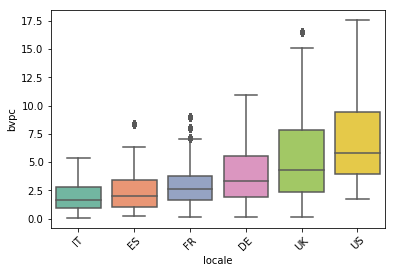

In [20]:
col_order = df1.groupby(['locale'])['bvpc'].aggregate(np.median).reset_index().sort_values('bvpc')
p = sns.boxplot(x = 'locale', y = 'bvpc', palette = 'Set2', data = df1, order=col_order['locale'], linewidth = 1.5)
plt.setp(p.get_xticklabels(), rotation=45);

The plot above show us that there are some outlier, I will now eliminate every campaign that the bvpc is 3 std deviation from the mean.

In [21]:
# Plot the BVPC mean
df1['bvpc'].mean()

3.3898366819178323

## 1.3 - CPC

CPC = CPA * BVPC

In [22]:
# Creat Cost Per Click column (cpc)
def calculate_cpc(row):
    if row['cpa'] != 0 and row['bvpc'] != 0:
        return row['cpa'] * row['bvpc']
    else:
        pass
    
df1['cpc'] = df1.apply(calculate_cpc, axis=1)

In [23]:
# create campaign_id column so I can stop making groupby everytime
# although, this will increase the volumen of the dataset
df1['campaign_id'] = df1.apply(lambda x: str(x['hotel_id']) + '_' + str(x['locale']), axis=1)

In [24]:
df1.tail(2)

,hotel_id,locale,city,country,abc_category,stars,rating,direct_cost,other_cost,direct_clicks,...,direct_booking_value,other_booking_value,date,direct_cost_per_campaign,direct_booking_value_per_campaign,cpa,direct_clicks_per_campaign,bvpc,cpc,campaign_id
109965,258366,US,Monemvasia,Greece,C2,3,7972,0,0,0,...,0.0,0.0,2019-01-06,1320,85.0,15.529412,9,9.444444,146.666667,258366_US
109966,258366,US,Monemvasia,Greece,C2,3,7972,0,0,0,...,0.0,0.0,2019-03-22,1320,85.0,15.529412,9,9.444444,146.666667,258366_US


# 2 - Feature Engineering

Manipulate data and create new columns. Below I will explain what each column means, and why I believe they are important when predicting bid.

**first_conv_click** - I calculated how many clicks it took for each campaign to have the first action. 

**first_conv_date** - When the first action/conversion occured.

**days_till_convert** - How many days it took to see the first conversion for wach campaign.

In [25]:
# Select columns that will be necessary to create the features described above
roll_bvpc = df1[['campaign_id','direct_booking_value', 'direct_clicks','date']]

roll_bvpc.tail()

,campaign_id,direct_booking_value,direct_clicks,date
109962,258366_US,0.0,0,2019-02-23
109963,258366_US,0.0,0,2019-03-21
109964,258366_US,0.0,0,2019-03-10
109965,258366_US,0.0,0,2019-01-06
109966,258366_US,0.0,0,2019-03-22


**first_conv_click** & **first_conv_date**

As we want to check the occurence of the first occurence, I will eliminate all rows that direct_booking is 0.

In [27]:
roll_bvpc['cumsum_clicks'] = roll_bvpc.groupby(['campaign_id']).direct_clicks.cumsum()
roll_bvpc = roll_bvpc[roll_bvpc['direct_booking_value'] != 0]

# Extract first_conv_date by taking taking the minimum value from column date, for each campaign.
first_conv_date = roll_bvpc.groupby(['campaign_id']).date.min().reset_index()
first_conv_date = first_conv_date.rename(columns={'date':'first_conv_date'})

# Using the cumsum_clicks column that was created above, extract the first_conv_click value for each campaign.
first_conv_click = roll_bvpc.groupby(['campaign_id']).cumsum_clicks.min().reset_index()
first_conv_click = first_conv_click.rename(columns={'cumsum_clicks':'first_conv_click'})

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


**days_till_convert**

In [28]:
# create df with the day that each campaign started
campaign_start = df1.groupby(['campaign_id']).date.min().reset_index()
campaign_start = campaign_start.rename(columns={'date':'campaign_start'})

# create df with the day that each campaign started
campaign_end = df1.groupby(['campaign_id']).date.max().reset_index()
campaign_end = campaign_end.rename(columns={'date':'campaign_end'})

In [29]:
# merge all values into one dataframe
first_conv = first_conv_date.merge(first_conv_click)
first_conv = first_conv.merge(campaign_start)
first_conv = first_conv.merge(campaign_end)

# delete dataframes that will no longer be used (housekeeping)
del roll_bvpc, first_conv_click, campaign_start, first_conv_date

In [30]:
# calculate delta time until the first conversion
first_conv['days_till_convert'] = first_conv.apply(lambda x: x['first_conv_date'] - x['campaign_start'], axis=1)

first_conv.head(2)

,campaign_id,first_conv_date,first_conv_click,campaign_start,campaign_end,days_till_convert
0,100000_DE,2019-01-29,66,2019-01-01,2019-03-31,28 days
1,100205_ES,2019-02-21,10,2019-01-17,2019-03-31,35 days


**merge into main df**

I will do an inner merge, meaning that I will only keep those campaigns that had at least one conversion.

I decided to do that due to the time constraint of the challenge

In [31]:
df1 = df1.merge(first_conv, how='inner')

In [32]:
del first_conv

In [33]:
df1.head()

,hotel_id,locale,city,country,abc_category,stars,rating,direct_cost,other_cost,direct_clicks,...,cpa,direct_clicks_per_campaign,bvpc,cpc,campaign_id,first_conv_date,first_conv_click,campaign_start,campaign_end,days_till_convert
0,8967,DE,Gotha,Germany,C2,4,8153,144,74,2,...,18.544325,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13 days
1,8967,DE,Gotha,Germany,C2,4,8153,385,0,5,...,18.544325,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13 days
2,8967,DE,Gotha,Germany,C2,4,8153,532,0,7,...,18.544325,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13 days
3,8967,DE,Gotha,Germany,C2,4,8153,576,0,8,...,18.544325,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13 days
4,8967,DE,Gotha,Germany,C2,4,8153,222,72,3,...,18.544325,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13 days


In [34]:
for i in ['campaign_start','campaign_end','first_conv_date']:
  df1[i] = df1[i].apply(lambda x: pd.to_datetime(str(x), format='%Y-%m-%d'))
  df1[i] = df1[i].apply(lambda x: x.date())

In [35]:
df1['days_till_convert'] = df1['days_till_convert'].apply(lambda x: str(x))

df1['days_till_convert'] = df1['days_till_convert'].apply(lambda x: int(x[:2]) if x[1] != ' ' else int(x[:1]))

In [36]:
df1['campaign_duration'] = df1.apply(lambda x: str(x['campaign_end'] - x['campaign_start']),axis=1)
df1['campaign_duration'] = df1['campaign_duration'].apply(lambda x: int(x[:2]) if x[1] != ' ' else int(x[:1]))

In [37]:
df1.head()

,hotel_id,locale,city,country,abc_category,stars,rating,direct_cost,other_cost,direct_clicks,...,direct_clicks_per_campaign,bvpc,cpc,campaign_id,first_conv_date,first_conv_click,campaign_start,campaign_end,days_till_convert,campaign_duration
0,8967,DE,Gotha,Germany,C2,4,8153,144,74,2,...,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89
1,8967,DE,Gotha,Germany,C2,4,8153,385,0,5,...,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89
2,8967,DE,Gotha,Germany,C2,4,8153,532,0,7,...,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89
3,8967,DE,Gotha,Germany,C2,4,8153,576,0,8,...,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89
4,8967,DE,Gotha,Germany,C2,4,8153,222,72,3,...,278,4.341727,80.514388,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89


In [40]:
# Sum other_costs column
other_click_per_campaign = (df1.groupby(['campaign_id']).other_clicks.sum().reset_index()
                                       .rename(columns={'other_clicks':'other_click_per_campaign'}))


df1 = df1.merge(other_click_per_campaign)

del other_click_per_campaign

In [41]:
# Sum other_bookings column
other_bookings_per_campaign = (df1.groupby(['campaign_id']).other_bookings.sum().reset_index()
                                       .rename(columns={'other_bookings':'other_bookings_per_campaign'}))


df1 = df1.merge(other_bookings_per_campaign)

del other_bookings_per_campaign

In [42]:
# Sum other_bookings column
other_booking_value_per_campaign = (df1.groupby(['campaign_id']).other_booking_value.sum().reset_index()
                                       .rename(columns={'other_booking_value':'other_booking_value_per_campaign'}))


df1 = df1.merge(other_booking_value_per_campaign)

del other_booking_value_per_campaign

# 3 - EDA - Exploratory Data Analysis

**Why I took so long to start visualizing the data set?**

I usually like to perform basic cleaning and transformations on the dataset, so I have more data to plot and analyze during EDA phase.

In [43]:
train_num = df1.select_dtypes(exclude=['object']).columns
train_num

Index(['hotel_id', 'stars', 'direct_cost', 'other_cost', 'direct_clicks',
       'other_clicks', 'direct_bookings', 'other_bookings',
       'direct_booking_value', 'other_booking_value', 'date',
       'direct_cost_per_campaign', 'direct_booking_value_per_campaign', 'cpa',
       'direct_clicks_per_campaign', 'bvpc', 'cpc', 'first_conv_click',
       'days_till_convert', 'campaign_duration', 'other_click_per_campaign',
       'other_bookings_per_campaign', 'other_booking_value_per_campaign'],
      dtype='object')

In [44]:
# I will exclude cpc_exp cause this field was calculated using bvpc column
train_num_corr = df1[train_num].drop(['hotel_id'], axis=1)
corr = pd.DataFrame(train_num_corr.corr(method = 'pearson')['bvpc'])
corr.sort_values(['bvpc'], ascending= False)

,bvpc
bvpc,1.000000
cpc,0.580608
direct_booking_value_per_campaign,0.263132
direct_booking_value,0.071584
other_booking_value_per_campaign,0.039258
direct_bookings,0.036956
stars,0.014315
other_booking_value,0.010057
other_cost,0.005678
direct_cost_per_campaign,0.003810


**Plot distribution of Direct Cost per Campaign for each locale**

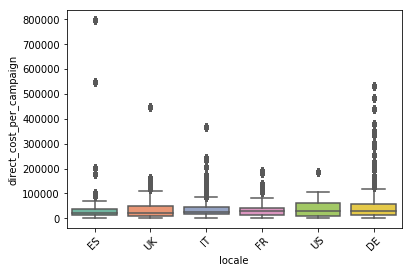

In [45]:
col_order = df1.groupby(['locale'])['direct_cost_per_campaign'].aggregate(np.median).reset_index().sort_values('direct_cost_per_campaign')
p = sns.boxplot(x = 'locale', y = 'direct_cost_per_campaign', palette = 'Set2', data = df1, order=col_order['locale'], linewidth = 1.5)
plt.setp(p.get_xticklabels(), rotation=45);

There are outliers on the dataset, so I will drop direct_cost_per_campaign outliers

In [46]:
df1['direct_cost_per_campaign'].describe()

count    109967.000000
mean      43664.434412
std       60922.155534
min        1223.000000
25%       13334.000000
50%       26530.000000
75%       49664.000000
max      796288.000000
Name: direct_cost_per_campaign, dtype: float64

In [47]:
# eliminate outliers
quantile = df1['direct_cost_per_campaign'].quantile(0.99)

df1 = df1[df1['direct_cost_per_campaign'] < quantile]

Plot the data again, without outliers now

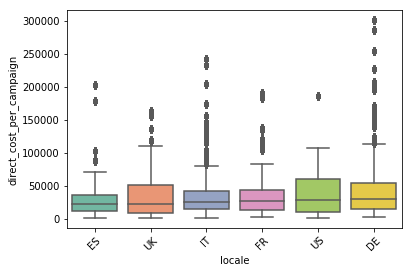

In [48]:
col_order = df1.groupby(['locale'])['direct_cost_per_campaign'].aggregate(np.median).reset_index().sort_values('direct_cost_per_campaign')
p = sns.boxplot(x = 'locale', y = 'direct_cost_per_campaign', palette = 'Set2', data = df1, order=col_order['locale'], linewidth = 1.5)
plt.setp(p.get_xticklabels(), rotation=45);

**Plot distribution of CPA for each locale**

In [49]:
df1['cpa'].describe()

count    108797.000000
mean         66.935462
std         102.834390
min          15.000468
25%          23.024110
50%          37.850601
75%          66.877551
max        1073.093458
Name: cpa, dtype: float64

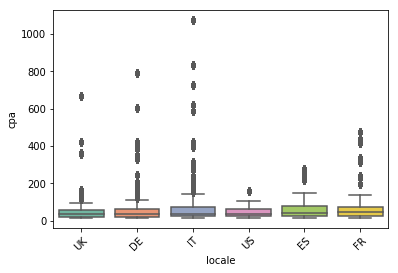

In [50]:
col_order = df1.groupby(['locale'])['cpa'].aggregate(np.median).reset_index().sort_values('cpa')
p = sns.boxplot(x = 'locale', y = 'cpa', palette = 'Set2', data = df1, order=col_order['locale'], linewidth = 1.5)
plt.setp(p.get_xticklabels(), rotation=45);

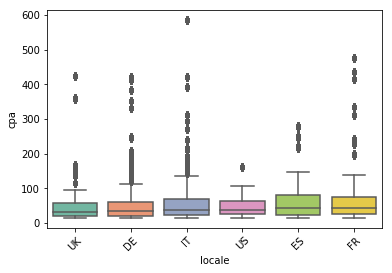

In [51]:
# eliminate outliers
quantile = df1['cpa'].quantile(0.99)

df1 = df1[df1['cpa'] < quantile]

col_order = df1.groupby(['locale'])['cpa'].aggregate(np.median).reset_index().sort_values('cpa')
p = sns.boxplot(x = 'locale', y = 'cpa', palette = 'Set2', data = df1, order=col_order['locale'], linewidth = 1.5)
plt.setp(p.get_xticklabels(), rotation=45);

## Important Note

I am droping outliers for simplicity, due to the time constraint.

I aknolewdge that this is not the best option, since the dataset is get smaller everytime, and if I have time, I will come back and try apply transformations on outliers.

**plot BVPC distribution according to how many stars the hoteliers has**

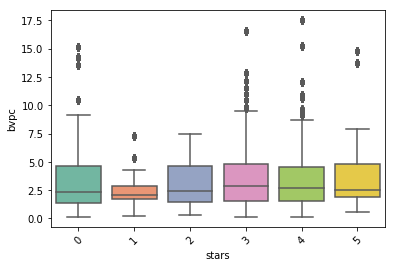

In [54]:
order_x = [x for x in range(0,6)]

col_order = df1.groupby(['stars'])['bvpc'].aggregate(np.median).reset_index().sort_values('bvpc')
p = sns.boxplot(x = 'stars', y = 'bvpc', palette = 'Set2', data = df1, linewidth = 1.5, order=order_x)
plt.setp(p.get_xticklabels(), rotation=45);

**plot direct_cost distribution according to how many stars by campaign**

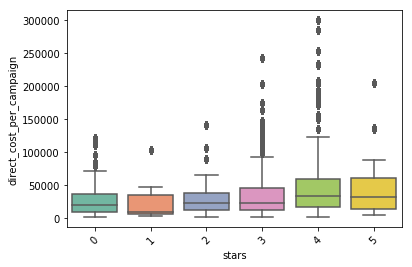

In [56]:
col_order = df1.groupby(['stars'])['direct_cost_per_campaign'].aggregate(np.median).reset_index().sort_values('direct_cost_per_campaign')
p = sns.boxplot(x = 'stars', y = 'direct_cost_per_campaign', palette = 'Set2', data = df1, linewidth = 1.5, order=order_x)
plt.setp(p.get_xticklabels(), rotation=45);

**Plot the direct_cost_per_campaign given the category of the hotel**

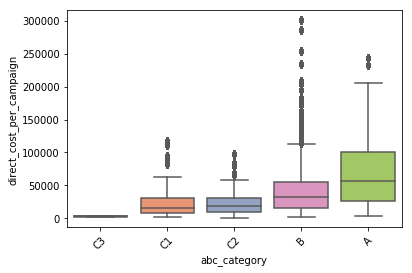

In [57]:
col_order = df1.groupby(['abc_category'])['direct_cost_per_campaign'].aggregate(np.median).reset_index().sort_values('direct_cost_per_campaign')
p = sns.boxplot(x = 'abc_category', y = 'direct_cost_per_campaign', palette = 'Set2', data = df1, linewidth = 1.5, order=col_order['abc_category'])
plt.setp(p.get_xticklabels(), rotation=45);

**Plot the bvpc given the category of the hotel**

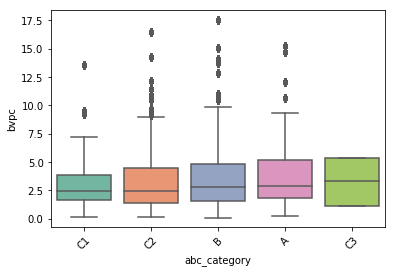

In [58]:
col_order = df1.groupby(['abc_category'])['bvpc'].aggregate(np.median).reset_index().sort_values('bvpc')
p = sns.boxplot(x = 'abc_category', y = 'bvpc', palette = 'Set2', data = df1, linewidth = 1.5, order=col_order['abc_category'])
plt.setp(p.get_xticklabels(), rotation=45);

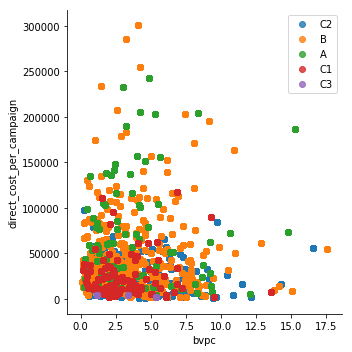

In [59]:
sns.lmplot( x='bvpc', y='direct_cost_per_campaign', data=df1, fit_reg=False, hue='abc_category', legend=False)
plt.legend(loc='upper right')


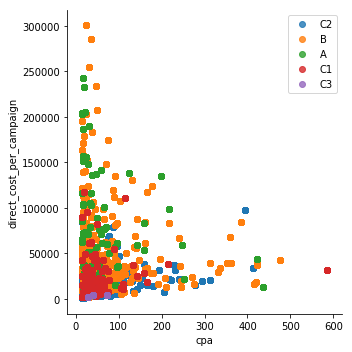

In [60]:
sns.lmplot( x='cpa', y='direct_cost_per_campaign', data=df1, fit_reg=False, hue='abc_category', legend=False)
plt.legend(loc='upper right')


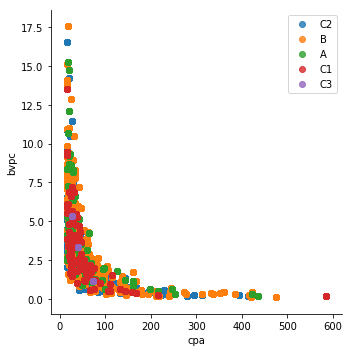

In [61]:
sns.lmplot( x='cpa', y='bvpc', data=df1, fit_reg=False, hue='abc_category', legend=False)
plt.legend(loc='upper right')

In [210]:
df1.head()

,hotel_id,locale,city,country,abc_category,stars,rating,direct_cost,other_cost,direct_clicks,...,campaign_id,first_conv_date,first_conv_click,campaign_start,campaign_end,days_till_convert,campaign_duration,other_click_per_campaign,other_bookings_per_campaign,other_booking_value_per_campaign
0,8967,DE,Gotha,Germany,C2,4,8153,144,74,2,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9
1,8967,DE,Gotha,Germany,C2,4,8153,385,0,5,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9
2,8967,DE,Gotha,Germany,C2,4,8153,532,0,7,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9
3,8967,DE,Gotha,Germany,C2,4,8153,576,0,8,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9
4,8967,DE,Gotha,Germany,C2,4,8153,222,72,3,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9


In [211]:
df1.columns

Index(['hotel_id', 'locale', 'city', 'country', 'abc_category', 'stars',
       'rating', 'direct_cost', 'other_cost', 'direct_clicks', 'other_clicks',
       'direct_bookings', 'other_bookings', 'direct_booking_value',
       'other_booking_value', 'date', 'direct_cost_per_campaign',
       'direct_booking_value_per_campaign', 'cpa',
       'direct_clicks_per_campaign', 'bvpc', 'cpc', 'campaign_id',
       'first_conv_date', 'first_conv_click', 'campaign_start', 'campaign_end',
       'days_till_convert', 'campaign_duration', 'other_click_per_campaign',
       'other_bookings_per_campaign', 'other_booking_value_per_campaign'],
      dtype='object')

In [212]:
df1.head()

,hotel_id,locale,city,country,abc_category,stars,rating,direct_cost,other_cost,direct_clicks,...,campaign_id,first_conv_date,first_conv_click,campaign_start,campaign_end,days_till_convert,campaign_duration,other_click_per_campaign,other_bookings_per_campaign,other_booking_value_per_campaign
0,8967,DE,Gotha,Germany,C2,4,8153,144,74,2,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9
1,8967,DE,Gotha,Germany,C2,4,8153,385,0,5,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9
2,8967,DE,Gotha,Germany,C2,4,8153,532,0,7,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9
3,8967,DE,Gotha,Germany,C2,4,8153,576,0,8,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9
4,8967,DE,Gotha,Germany,C2,4,8153,222,72,3,...,8967_DE,2019-01-14,111,2019-01-01,2019-03-31,13,89,54,1,171.9


In [213]:
df3 = df1

In [214]:
df1.to_csv('df1_final.csv')